<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/Accessing_layer_Variables_using_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
from tensorflow.keras.applications import VGG19
base_model = VGG19(weights='imagenet', include_top=True)

574710816/574710816 [==============================] - 3s 0us/step


In [16]:
vgg_input=base_model.input
vgg_layers=base_model.layers
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras.models import Model

In [19]:
layer_outputs=[layer.output for layer in vgg_layers]
features=Model(inputs=vgg_input,outputs=layer_outputs)

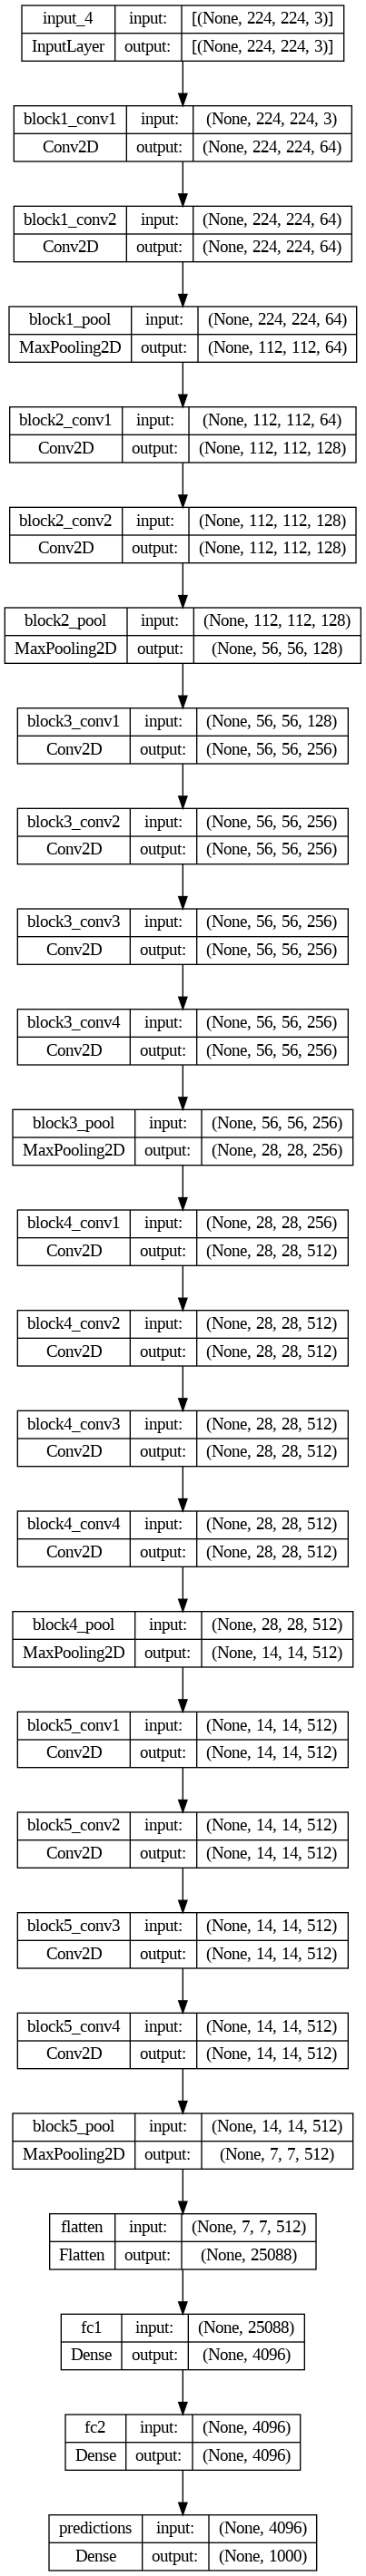

In [20]:
tf.keras.utils.plot_model(features,"vgg19.png",show_shapes=True)

In [23]:
img=np.random.random((1,224,224,3)).astype('float32')
extracted_features=features(img)

In [24]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

In [26]:
img_path='/content/lion.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [27]:
extracted_features=features(x)

Visualizing channel


 f1.shape: (1, 224, 224, 3)


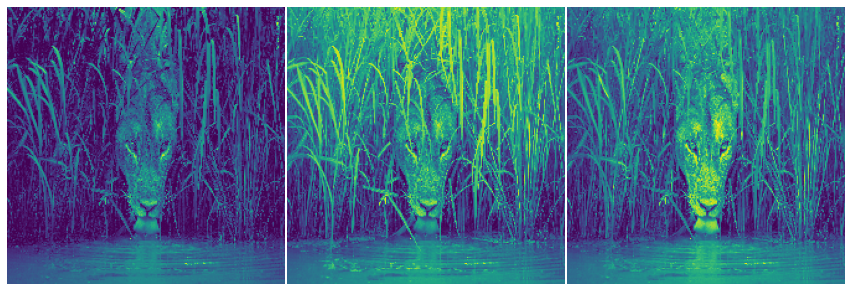

In [32]:
f1=extracted_features[0]
print('\n f1.shape:',f1.shape)
imgs=f1[0,:,:]
plt.figure(figsize=(15,15))
for n in range(3):
  ax=plt.subplot(1,3,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)


 f2.shape: (1, 224, 224, 64)


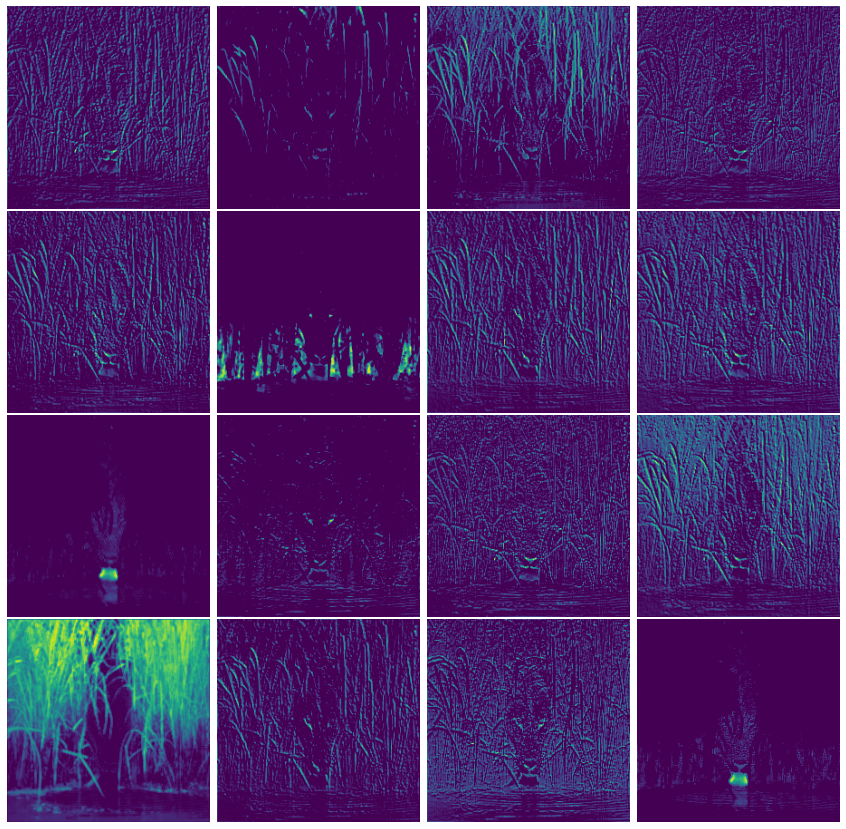

In [35]:
f2=extracted_features[1]
print('\n f2.shape:',f2.shape)
imgs=f2[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
  ax=plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)

In [36]:
extract_features_block1_pool=Model(inputs=features.input,outputs=features.get_layer('block1_pool').output)
block1_pool_features=extract_features_block1_pool.predict(x)

1/1 [==============================] - 0s 372ms/step


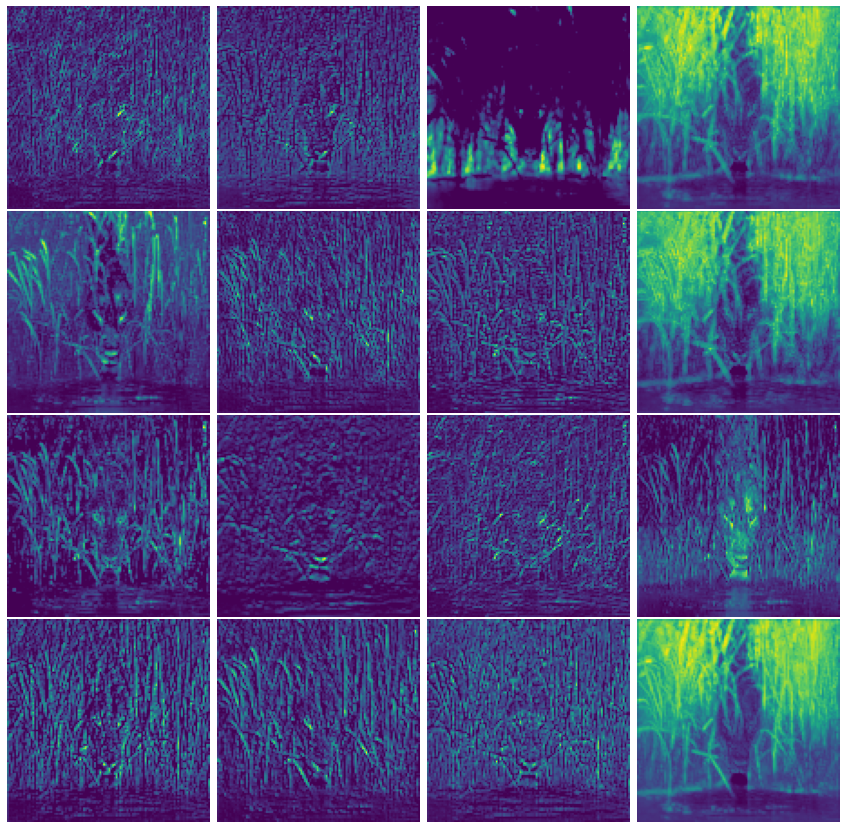

In [37]:
imgs=block1_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
  ax=plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)

In [38]:
extract_features_block5_conv4=Model(inputs=features.input,outputs=features.get_layer('block5_conv4').output)
block1_pool_features=extract_features_block5_conv4.predict(x)

1/1 [==============================] - 1s 603ms/step


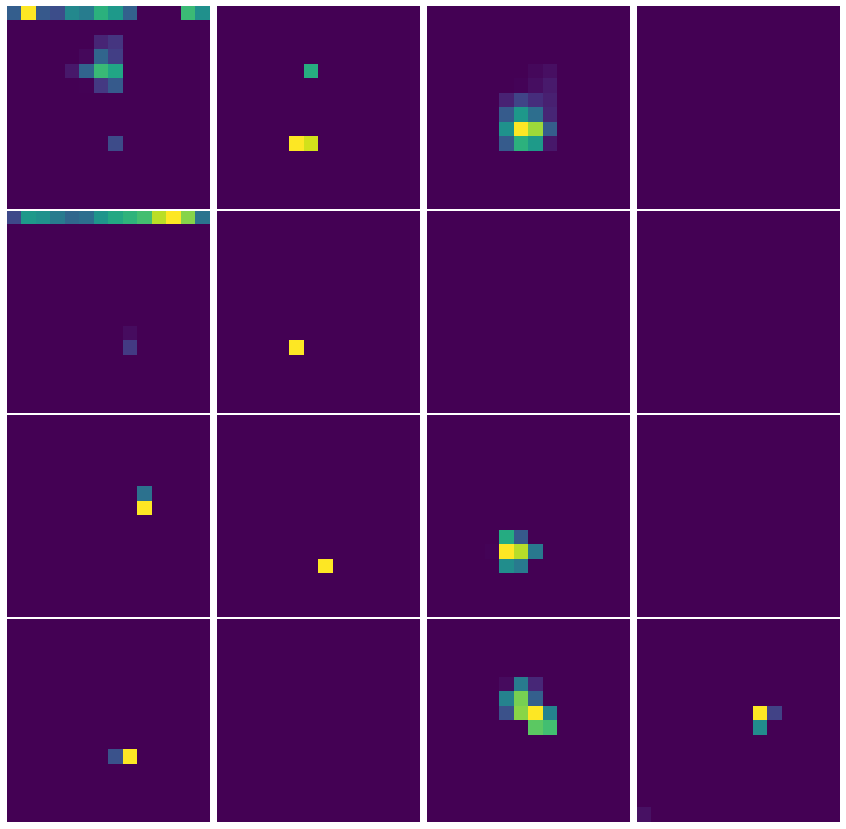

In [39]:
imgs=block1_pool_features[0,:,:]
plt.figure(figsize=(15,15))
for n in range(16):
  ax=plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=0.01)